## Genre Genie - Multi-label Classification with NLP
### Part 1.3: Merging scraped data, cleaning up, and binary encoding genres

#### Tom Keith

---

**Goal:** Use the 100 .tsv files scraped from IMDb and clean up the data. Also binary encode the genres.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
#import scipy.sparse
%matplotlib inline

Merge the 100 .tsv files into one big dataframe.

In [2]:
%%time
list_of_dfs = []
for yr in range (1920,2020):
    file_path = f'rawdata/imdb_scrape_{yr}.tsv'
    temp_df = pd.read_csv(file_path, sep='\t', index_col=0)
    list_of_dfs.append(temp_df)

# Combine all dfs
unclean_df = pd.concat(list_of_dfs, ignore_index=True)

#unclean_df.to_csv(f'imdb_scrape_full.tsv', sep='\t', quoting=csv.QUOTE_ALL)
#unclean_df = pd.read_csv('imdb_scrape_full.tsv', sep='\t', index_col=0)

unclean_df.sample(20)

Wall time: 1.3 s


,tconst,title,release_year,release_date,MPAA,genre,runtime,poster_url,plot_short,plot_long,imdb_rating,num_imdb_votes,plot_full,metacritic,num_user_reviews,num_critic_reviews
23705,tt2446042,Taken 3,2014,9 January 2015,PG-13,"['Action', 'Thriller']",108,https://m.media-amazon.com/images/M/MV5BNjM5MD...,Accused of a ruthless murder he never committe...,Liam Neeson returns as ex-covert operative Bry...,6.0,171159,Two Russian thugs enter a man's home and quiet...,26.0,384.0,238.0
19476,tt1117636,Strigoi,2009,17 August 2009,Not Rated,"['Comedy', 'Drama', 'Fantasy', 'Horror']",105,https://m.media-amazon.com/images/M/MV5BMjExMz...,"When the villagers killed Constantin Tirescu, ...","When the villagers killed Constantin Tirescu, ...",5.5,1108,NaN,NaN,19.0,51.0
4396,tt0066906,Le chat,1971,24 April 1971,NaN,Drama,86,https://m.media-amazon.com/images/M/MV5BMWI1YT...,"Courbevoie (France), 1971. Julien Bouin, a for...","Courbevoie (France), 1971. Julien Bouin, a for...",7.6,1662,NaN,NaN,10.0,8.0
24450,tt3785068,One Direction: Where We Are - The Concert Film,2014,11 October 2014,TV-PG,"['Documentary', 'Music']",75,https://m.media-amazon.com/images/M/MV5BMTkyMT...,From X Factor to the San Siro Stadium in Milan...,From X Factor to the San Siro Stadium in Milan...,6.6,2101,NaN,NaN,4.0,1.0
1525,tt0042788,Night and the City,1950,27 November 1950,Not Rated,"['Crime', 'Film-Noir', 'Mystery', 'Sport', 'Th...",96,https://m.media-amazon.com/images/M/MV5BZTJlMD...,A small-time grifter and nightclub tout takes ...,Harry Fabian is a London hustler with ambitiou...,7.9,11107,NaN,NaN,90.0,78.0
20984,tt1764600,Sluzhebnyy roman. Nashe vremya,2011,17 March 2011,NaN,"['Comedy', 'Romance']",91,https://m.media-amazon.com/images/M/MV5BNTdlM2...,"Meet Liudmila Kalugina, she's a young business...","Meet Liudmila Kalugina, she's a young business...",5.0,3579,NaN,NaN,2.0,1.0
23226,tt3017864,Ghost in the Shell Arise: Border 2 - Ghost Whi...,2013,30 November 2013,TV-MA,"['Animation', 'Action', 'Sci-Fi', 'Thriller']",57,https://m.media-amazon.com/images/M/MV5BYTI0ZD...,Witness the formation of the legendary Public ...,Freed of her responsibilities with the 501 Org...,7.3,2516,NaN,NaN,3.0,6.0
14471,tt0363163,Der Untergang,2004,16 September 2004,R,"['Biography', 'Drama', 'History', 'War']",156,https://m.media-amazon.com/images/M/MV5BZDA2Zj...,"Traudl Junge, the final secretary for Adolf Hi...","In April of 1945, Germany stands at the brink ...",8.2,315918,The film starts out with a short clip from a d...,82.0,619.0,208.0
18986,tt1337051,"Politist, adjectiv",2009,3 July 2009,Not Rated,"['Crime', 'Drama']",115,https://m.media-amazon.com/images/M/MV5BZjk3Yz...,A police officer refuses to arrest a young man...,"In grim, dull Vaslui, Cristi is a young police...",7.0,4577,NaN,81.0,43.0,133.0
29042,tt6958014,Duck Butter,2018,27 April 2018,Not Rated,"['Comedy', 'Drama', 'Romance']",93,https://m.media-amazon.com/images/M/MV5BMTU4MT...,"Two women, who are dissatisfied with the disho...","Two women, who are dissatisfied with the disho...",5.2,2446,NaN,58.0,24.0,14.0


In [3]:
unclean_df.isna().sum()

tconst                    0
title                     0
release_year              0
release_date              0
MPAA                   5611
genre                     0
runtime                   0
poster_url                0
plot_short               37
plot_long                37
imdb_rating               0
num_imdb_votes            0
plot_full             20087
metacritic            18071
num_user_reviews        132
num_critic_reviews      898
dtype: int64

In [4]:
unclean_df.dtypes

tconst                 object
title                  object
release_year            int64
release_date           object
MPAA                   object
genre                  object
runtime                 int64
poster_url             object
plot_short             object
plot_long              object
imdb_rating           float64
num_imdb_votes          int64
plot_full              object
metacritic            float64
num_user_reviews      float64
num_critic_reviews    float64
dtype: object

We have a lot of null values, mostly in `plot_full`, `metacritic` and `MPAA`. Additionally, we don't need `poster_url` as we don't need the posters. We have three 'plot' columns. I scraped all 3 thinking that `plot_full`, which is bar far the longest plot text of the three, would be the best one to use due to the length. However, 2/3 of the values are null, so I can't use it.

The columns I really want to focus on is `genre` and `plot_short` or `plot_long`. There are some null values in these columns, let's drop those as well as the unusable columns mentioned above.

In [5]:
unclean_df = unclean_df.dropna(axis=0, subset=['plot_long'])
unclean_df = unclean_df.drop(['poster_url','plot_full','MPAA', 'metacritic'], axis=1)
unclean_df.head()

,tconst,title,release_year,release_date,genre,runtime,plot_short,plot_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews
0,tt0010323,Das Cabinet des Dr. Caligari,1920,27 February 1920,"['Fantasy', 'Horror', 'Mystery', 'Thriller']",67,"Hypnotist Dr. Caligari uses a somnambulist, Ce...","Francis, a young man, recalls in his memory th...",8.1,52815,222.0,156.0
1,tt0011237,"Der Golem, wie er in die Welt kam",1920,19 June 1921,"['Fantasy', 'Horror']",91,"In 16th-century Prague, a rabbi creates the Go...","In 16th-century Prague, a rabbi creates the Go...",7.2,6136,49.0,45.0
2,tt0011841,Way Down East,1920,3 September 1920,"['Drama', 'Romance']",145,A naive country girl is tricked into a sham ma...,"The callous rich, portrayed by Lennox, think o...",7.4,4800,49.0,28.0
3,tt0011130,Dr. Jekyll and Mr. Hyde,1920,28 September 1920,"['Drama', 'Horror', 'Sci-Fi']",82,Dr. Henry Jekyll experiments with scientific m...,Based on the Robert Louis Stevenson story: Doc...,7.0,4564,71.0,65.0
4,tt0011870,Within Our Gates,1920,12 January 1920,"['Drama', 'Romance']",79,"Abandoned by her fiancé, an educated black wom...",Southern negro Sylvia Landry visits her cousin...,6.3,2139,20.0,13.0


In [6]:
unclean_df.isna().sum()

tconst                  0
title                   0
release_year            0
release_date            0
genre                   0
runtime                 0
plot_short              0
plot_long               0
imdb_rating             0
num_imdb_votes          0
num_user_reviews      131
num_critic_reviews    881
dtype: int64

Only null values are the number of critic and user reviews. These are null, but they are really 0 (as my scraper returned nothing). Fill these remaining null values with 0.

In [7]:
unclean_df = unclean_df.fillna(0)
unclean_df.isna().sum()

tconst                0
title                 0
release_year          0
release_date          0
genre                 0
runtime               0
plot_short            0
plot_long             0
imdb_rating           0
num_imdb_votes        0
num_user_reviews      0
num_critic_reviews    0
dtype: int64

Looking good. The data is now free of any null values.

---

**Encoding Genres**

The genres look like they are being stored as lists in the dataframe. Let's get a closer look.

In [8]:
type(unclean_df['genre'][0])

str

In [9]:
print(unclean_df['genre'][0])

['Fantasy', 'Horror', 'Mystery', 'Thriller']


Unfortunately, it is a string that looks like a list, rather than an iterable list. To handle this, I played around with `literal_eval()` and `MultiLabelBinarizer()`. However, I found simple iterations over the data to format it was the simplest solution.

---

I need a list with all the unique genre names to see how many there are before binary encoding them.

In [10]:
%%time
all_genres = []

for row in unclean_df['genre']:
    # Clean up genre name before adding to master list
    i = row.strip('[]').replace("'",'').split(', ')
    for j in i:
        all_genres.append(j)
        
all_genres = list(set(all_genres))

Wall time: 38 ms


In [11]:
len(all_genres)

25

In [12]:
all_genres.sort()
all_genres = [g.lower() for g in all_genres]
print(all_genres)

['action', 'adult', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'film-noir', 'game-show', 'history', 'horror', 'music', 'musical', 'mystery', 'news', 'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western']


There are 25 genres in this dataset.

Let's encode them! First add 25 columns, 1 for each genre, with default values of 0.

In [13]:
%%time
# Create new columns with genre names
# Set all values to 0
for genre_name in all_genres:
    unclean_df.loc[:, genre_name] = 0

Wall time: 108 ms


In [14]:
unclean_df

,tconst,title,release_year,release_date,genre,runtime,plot_short,plot_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western
0,tt0010323,Das Cabinet des Dr. Caligari,1920,27 February 1920,"['Fantasy', 'Horror', 'Mystery', 'Thriller']",67,"Hypnotist Dr. Caligari uses a somnambulist, Ce...","Francis, a young man, recalls in his memory th...",8.1,52815,222.0,156.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0011237,"Der Golem, wie er in die Welt kam",1920,19 June 1921,"['Fantasy', 'Horror']",91,"In 16th-century Prague, a rabbi creates the Go...","In 16th-century Prague, a rabbi creates the Go...",7.2,6136,49.0,45.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt0011841,Way Down East,1920,3 September 1920,"['Drama', 'Romance']",145,A naive country girl is tricked into a sham ma...,"The callous rich, portrayed by Lennox, think o...",7.4,4800,49.0,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0011130,Dr. Jekyll and Mr. Hyde,1920,28 September 1920,"['Drama', 'Horror', 'Sci-Fi']",82,Dr. Henry Jekyll experiments with scientific m...,Based on the Robert Louis Stevenson story: Doc...,7.0,4564,71.0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,tt0011870,Within Our Gates,1920,12 January 1920,"['Drama', 'Romance']",79,"Abandoned by her fiancé, an educated black wom...",Southern negro Sylvia Landry visits her cousin...,6.3,2139,20.0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30077,tt11529348,5Gang: Un Altfel de Craciun,2019,27 December 2019,"['Action', 'Comedy']",100,The story is about friendship and family witch...,The story is about friendship and family witch...,1.4,1347,19.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30078,tt9285882,Blue Story,2019,22 November 2019,"['Crime', 'Drama']",91,Feature adaptation of Rapman's YouTube series ...,Blue Story is a tragic tale of a friendship be...,5.5,1066,60.0,19.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30079,tt5990444,The Trap,2019,1 April 2019,Comedy,90,A man returns home to Atlanta to help his brot...,"A good man (Tip ""T.I."" Harris) returns home to...",4.2,1010,43.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30080,tt7319496,Ut og stjæle hester,2019,8 March 2019,"['Drama', 'Mystery']",123,A grieving widower moves to the country where ...,A grieving widower moves to the country where ...,6.7,1057,5.0,36.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


That worked well (looking at the rightmost columns). Now let's actually encode the `genre` column into a binary representation in the 25 new columns.

This script below loops through each row, and in each row, loops through each genre to see if it's in the `genre` column. Whether it is or not, it changes the value to the integer representation of `True` (1) or `False` (0) based on the result.

In [15]:
%%time
# Go through all rows to check if movie has each genre
# Change boolean value to int (0 = False) if the movie has genre
# This takes some time...
for i in unclean_df.index:
    for genre in all_genres:
        unclean_df.loc[ unclean_df.index == i, genre ] = int(genre in unclean_df['genre'][i].lower())
    if i % 100 == 0:
        print(i, end='\r')

Wall time: 14min 4s


In [16]:
unclean_df

,tconst,title,release_year,release_date,genre,runtime,plot_short,plot_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western
0,tt0010323,Das Cabinet des Dr. Caligari,1920,27 February 1920,"['Fantasy', 'Horror', 'Mystery', 'Thriller']",67,"Hypnotist Dr. Caligari uses a somnambulist, Ce...","Francis, a young man, recalls in his memory th...",8.1,52815,222.0,156.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1,tt0011237,"Der Golem, wie er in die Welt kam",1920,19 June 1921,"['Fantasy', 'Horror']",91,"In 16th-century Prague, a rabbi creates the Go...","In 16th-century Prague, a rabbi creates the Go...",7.2,6136,49.0,45.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,tt0011841,Way Down East,1920,3 September 1920,"['Drama', 'Romance']",145,A naive country girl is tricked into a sham ma...,"The callous rich, portrayed by Lennox, think o...",7.4,4800,49.0,28.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,tt0011130,Dr. Jekyll and Mr. Hyde,1920,28 September 1920,"['Drama', 'Horror', 'Sci-Fi']",82,Dr. Henry Jekyll experiments with scientific m...,Based on the Robert Louis Stevenson story: Doc...,7.0,4564,71.0,65.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,tt0011870,Within Our Gates,1920,12 January 1920,"['Drama', 'Romance']",79,"Abandoned by her fiancé, an educated black wom...",Southern negro Sylvia Landry visits her cousin...,6.3,2139,20.0,13.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30077,tt11529348,5Gang: Un Altfel de Craciun,2019,27 December 2019,"['Action', 'Comedy']",100,The story is about friendship and family witch...,The story is about friendship and family witch...,1.4,1347,19.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30078,tt9285882,Blue Story,2019,22 November 2019,"['Crime', 'Drama']",91,Feature adaptation of Rapman's YouTube series ...,Blue Story is a tragic tale of a friendship be...,5.5,1066,60.0,19.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30079,tt5990444,The Trap,2019,1 April 2019,Comedy,90,A man returns home to Atlanta to help his brot...,"A good man (Tip ""T.I."" Harris) returns home to...",4.2,1010,43.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30080,tt7319496,Ut og stjæle hester,2019,8 March 2019,"['Drama', 'Mystery']",123,A grieving widower moves to the country where ...,A grieving widower moves to the country where ...,6.7,1057,5.0,36.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [17]:
unclean_df.columns

Index(['tconst', 'title', 'release_year', 'release_date', 'genre', 'runtime',
       'plot_short', 'plot_long', 'imdb_rating', 'num_imdb_votes',
       'num_user_reviews', 'num_critic_reviews', 'action', 'adult',
       'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary',
       'drama', 'family', 'fantasy', 'film-noir', 'game-show', 'history',
       'horror', 'music', 'musical', 'mystery', 'news', 'romance', 'sci-fi',
       'sport', 'thriller', 'war', 'western'],
      dtype='object')

These are the columns that remain. All the genres will end up as our target, and the remaining columns will either be dropped, or feature engineered.

---

Check the genre distribution for outliers.

In [18]:
for g in all_genres:
    print(f'{g:12} {unclean_df[g].value_counts()[1]:6}')

action         5490
adult             2
adventure      3339
animation       965
biography      1599
comedy        10564
crime          4919
documentary    1333
drama         16750
family         1809
fantasy        2354
film-noir       311
game-show         1
history        1382
horror         4033
music          1869
musical         874
mystery        2776
news             41
romance        6732
sci-fi         2477
sport           794
thriller       7515
war            1493
western         676


In [19]:
g_count = []
genres = []

for g in all_genres:
    #print(f'{g:12} {unclean_df[g].value_counts()[1]:6}')
    genres.append(g)
    g_count.append(unclean_df[g].value_counts()[1])

genre_counts = dict(zip(genres, g_count))

dfg = pd.DataFrame.from_dict(genre_counts,orient='index')
dfg = dfg.reset_index()
dfg.columns = ['genre','count']
dfg = dfg.sort_values('count', ascending=False)
dfg

,genre,count
8,drama,16750
5,comedy,10564
22,thriller,7515
19,romance,6732
0,action,5490
6,crime,4919
14,horror,4033
2,adventure,3339
17,mystery,2776
20,sci-fi,2477


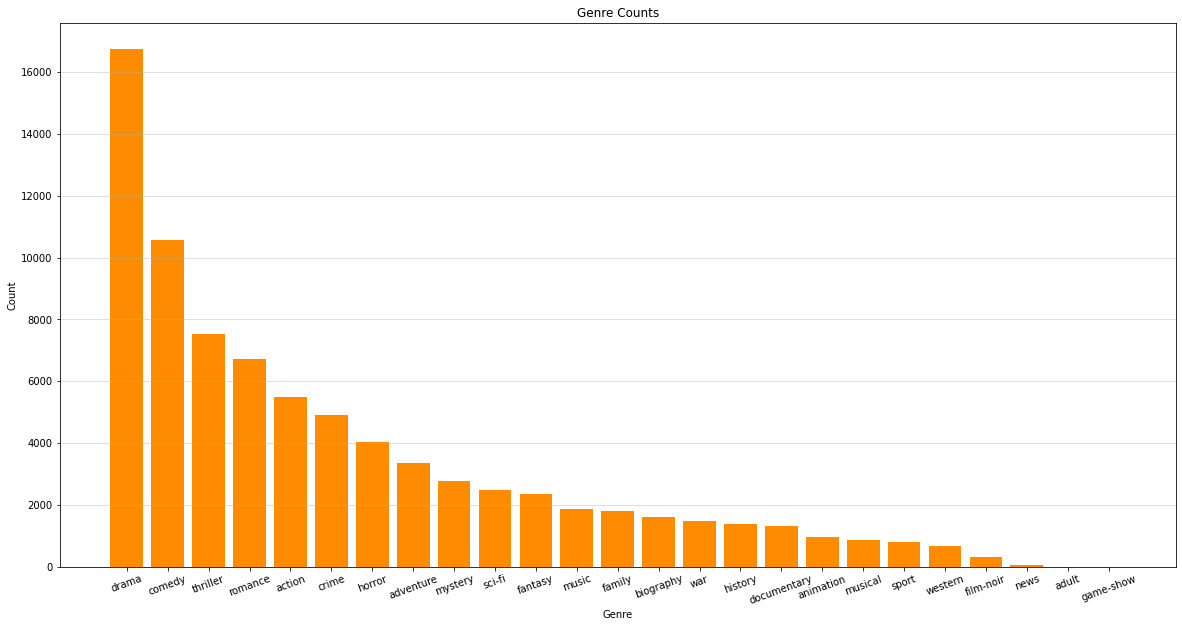

In [20]:
dfg = dfg.sort_values('count', ascending=False)
plt.figure(figsize=(20,10))
plt.bar(dfg['genre'], dfg['count'], color='darkorange')
plt.title('Genre Counts')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.grid(axis='y', alpha=0.5)
plt.xticks(rotation='20')
#plt.xticks(range(0,17001,1000))
plt.show()
plt.savefig('images/genre-counts.png')

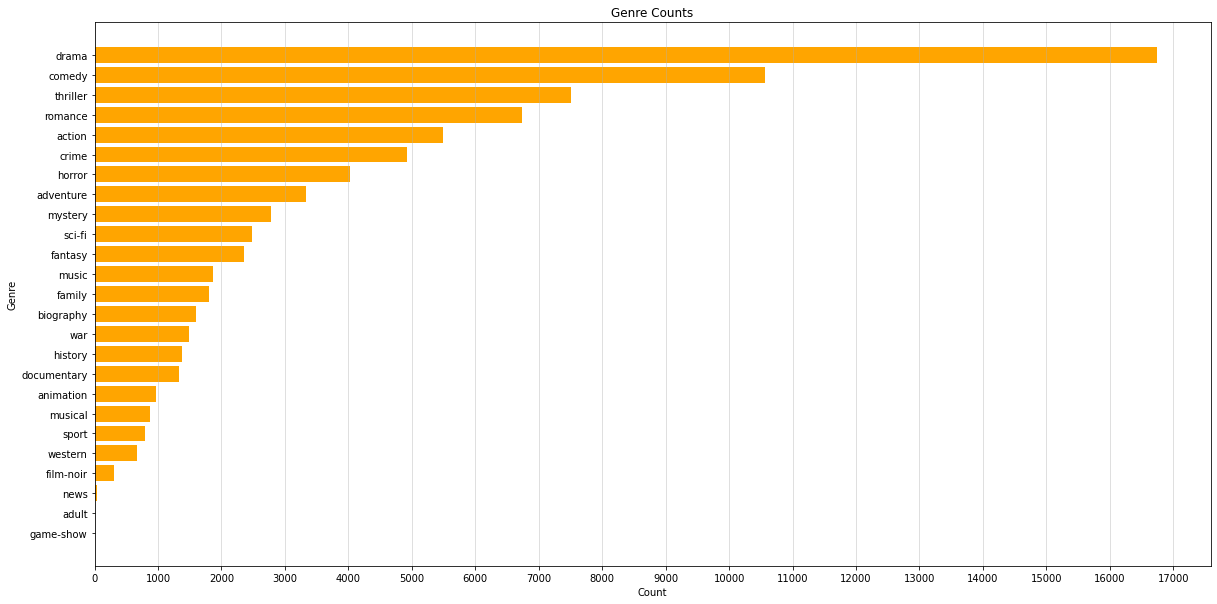

In [21]:
dfg = dfg.sort_values('count', ascending=True)
plt.figure(figsize=(20,10))
plt.barh(dfg['genre'], dfg['count'], color='orange')
plt.title('Genre Counts')
plt.ylabel('Genre')
plt.xlabel('Count')
plt.xticks(range(0,17001,1000))
plt.grid(axis='x', alpha=0.5)
plt.show()

The 3 least represented genres (`news`,`game-show`, `adult`) need closer inspection.

In [22]:
unclean_df[unclean_df['news'] == 1]

,tconst,title,release_year,release_date,genre,runtime,plot_short,plot_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western
14644,tt0388789,Born Into Brothels: Calcutta's Red Light Kids,2004,11 March 2005,"['Documentary', 'Biography', 'News']",85,Two documentary filmmakers chronicle their tim...,Documentary photographer Zana Briski journeyed...,7.2,15479,89.0,68.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
16014,tt0497116,An Inconvenient Truth,2006,30 June 2006,"['Documentary', 'News']",96,Filmmaker Davis Guggenheim follows Al Gore on ...,A documentary on the threat that climate chang...,7.4,78775,520.0,141.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17047,tt0854678,Taxi to the Dark Side,2007,23 January 2009,"['Documentary', 'Crime', 'News', 'War']",106,Alex Gibney exposes the haunting details of th...,Using the torture and death in 2002 of an inno...,7.4,14324,47.0,82.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
17817,tt1286537,"Food, Inc.",2008,31 July 2009,"['Documentary', 'News']",94,An unflattering look inside America's corporat...,The current method of raw food production is l...,7.8,48477,191.0,122.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
18294,tt1333634,Burma VJ: Reporter i et lukket land,2008,9 January 2009,"['Documentary', 'History', 'News']",84,"Using smuggled footage, this documentary tells...","Using smuggled footage, this documentary tells...",8.0,2283,15.0,52.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
18713,tt1232207,Capitalism: A Love Story,2009,2 October 2009,"['Documentary', 'Crime', 'News']",127,An examination of the social costs of corporat...,Capitalism: A Love Story examines the impact o...,7.4,40228,193.0,218.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
19013,tt1300563,The Age of Stupid,2009,20 August 2009,"['Documentary', 'History', 'News', 'War']",92,A future archivist looks at old footage from t...,This ambitious documentary/drama/animation hyb...,7.0,4130,45.0,42.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
19979,tt1789083,The Weight of Chains,2010,19 February 2011,"['Documentary', 'History', 'News', 'War']",124,The Weight of Chains is a Canadian documentary...,The Weight of Chains is a Canadian documentary...,8.2,4050,53.0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
21026,tt1787725,If a Tree Falls: A Story of the Earth Liberati...,2011,3 May 2011,"['Documentary', 'Biography', 'Crime', 'Drama',...",85,A rare behind-the-curtain look at the Earth Li...,IF A TREE FALLS is a rare behind-the-curtain l...,7.2,3000,17.0,29.0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
21186,tt1787837,We Were Here,2011,September 2011,"['Documentary', 'Biography', 'History', 'News']",90,A deep and reflective look at the arrival and ...,'We Were Here' is the first film to take a dee...,7.9,1895,9.0,33.0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [23]:
unclean_df[unclean_df['game-show'] == 1]

,tconst,title,release_year,release_date,genre,runtime,plot_short,plot_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western
27703,tt2088950,This Is Your Death,2017,15 September 2017,"['Drama', 'Game-Show', 'Thriller']",104,An unsettling look at reality T.V. where a dis...,An unsettling look at reality T.V. where a dis...,5.6,3675,34.0,31.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


News looks like it can be dropped as they all share `documentary` as a genre, thus making `news` redundant.

`game-show` and `adult` rows will be dropped as it's only 3 rows.

In [24]:
new_df = unclean_df
new_df = new_df[unclean_df['adult'] == 0]
new_df = new_df[new_df['game-show'] == 0]
#new_df = new_df[new_df['news'] == 0]

In [25]:
final_genres = all_genres
all_genres.remove('adult')
all_genres.remove('game-show')
all_genres.remove('news')
print(all_genres)

['action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'film-noir', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western']


In [26]:
new_df = new_df.drop(['adult','game-show','news','genre'], axis=1)
new_df

,tconst,title,release_year,release_date,runtime,plot_short,plot_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western
0,tt0010323,Das Cabinet des Dr. Caligari,1920,27 February 1920,67,"Hypnotist Dr. Caligari uses a somnambulist, Ce...","Francis, a young man, recalls in his memory th...",8.1,52815,222.0,156.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1,tt0011237,"Der Golem, wie er in die Welt kam",1920,19 June 1921,91,"In 16th-century Prague, a rabbi creates the Go...","In 16th-century Prague, a rabbi creates the Go...",7.2,6136,49.0,45.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,tt0011841,Way Down East,1920,3 September 1920,145,A naive country girl is tricked into a sham ma...,"The callous rich, portrayed by Lennox, think o...",7.4,4800,49.0,28.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,tt0011130,Dr. Jekyll and Mr. Hyde,1920,28 September 1920,82,Dr. Henry Jekyll experiments with scientific m...,Based on the Robert Louis Stevenson story: Doc...,7.0,4564,71.0,65.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,tt0011870,Within Our Gates,1920,12 January 1920,79,"Abandoned by her fiancé, an educated black wom...",Southern negro Sylvia Landry visits her cousin...,6.3,2139,20.0,13.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30077,tt11529348,5Gang: Un Altfel de Craciun,2019,27 December 2019,100,The story is about friendship and family witch...,The story is about friendship and family witch...,1.4,1347,19.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30078,tt9285882,Blue Story,2019,22 November 2019,91,Feature adaptation of Rapman's YouTube series ...,Blue Story is a tragic tale of a friendship be...,5.5,1066,60.0,19.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30079,tt5990444,The Trap,2019,1 April 2019,90,A man returns home to Atlanta to help his brot...,"A good man (Tip ""T.I."" Harris) returns home to...",4.2,1010,43.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30080,tt7319496,Ut og stjæle hester,2019,8 March 2019,123,A grieving widower moves to the country where ...,A grieving widower moves to the country where ...,6.7,1057,5.0,36.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [27]:
new_df.columns

Index(['tconst', 'title', 'release_year', 'release_date', 'runtime',
       'plot_short', 'plot_long', 'imdb_rating', 'num_imdb_votes',
       'num_user_reviews', 'num_critic_reviews', 'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'film-noir', 'history', 'horror', 'music',
       'musical', 'mystery', 'romance', 'sci-fi', 'sport', 'thriller', 'war',
       'western'],
      dtype='object')

After dropping those rows and columns, we now have a pretty clean and fully genre encoded dataset with 22 genres. Export this for further EDA and feature engineering.

In [28]:
import csv
new_df.to_csv('data/encoded_genres.tsv', sep='\t', quoting=csv.QUOTE_ALL)